In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train_data = pd.read_csv('/kaggle/input/human-acitivity-recognition/train (1).csv')

In [17]:
test_data=pd.read_csv('/kaggle/input/human-acitivity-recognition/test.csv')

In [18]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [19]:
sns.set_palette('rainbow')
sns.set_style('darkgrid')

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [22]:
train_data=train_data.drop_duplicates()


In [23]:
test_data=test_data.drop_duplicates()

Since this dataset is high dimensional (more than 100 features), this will make a problem in every data cleaning step.

In [24]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [25]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [26]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

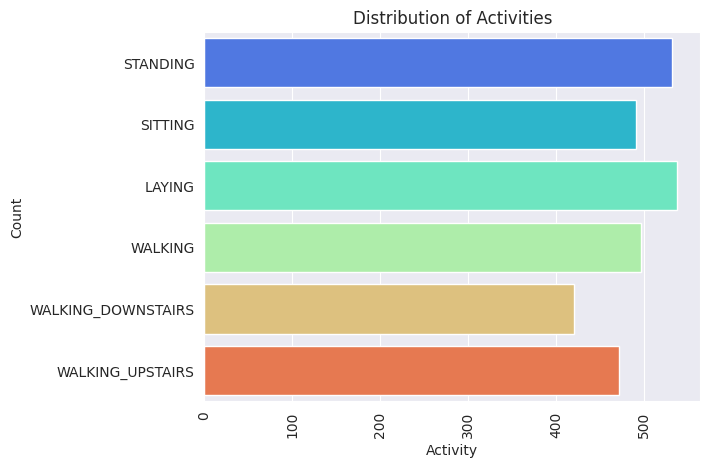

In [27]:
# Assuming 'Activity' is the column containing activity data
sns.countplot(y=test_data['Activity'],palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Distribution of Activities')
plt.show()

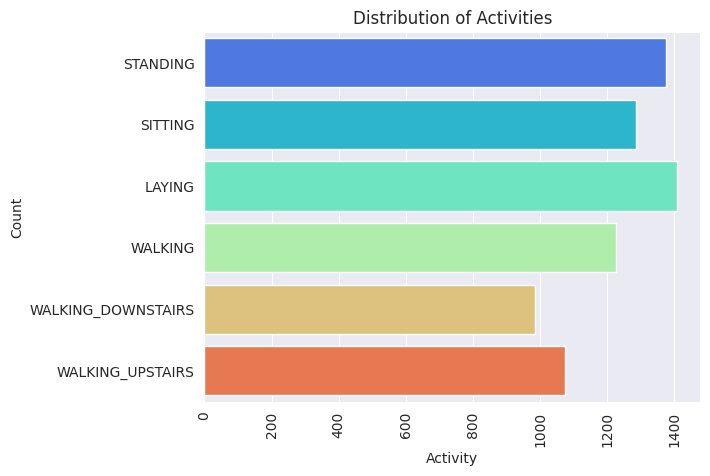

In [30]:
# Assuming 'Activity' is the column containing activity data
sns.countplot(y=train_data['Activity'],palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Distribution of Activities')
plt.show()

In [31]:
train_data.describe()['subject']

count    7352.000000
mean       17.413085
std         8.975143
min         1.000000
25%         8.000000
50%        19.000000
75%        26.000000
max        30.000000
Name: subject, dtype: float64

<Axes: ylabel='subject'>

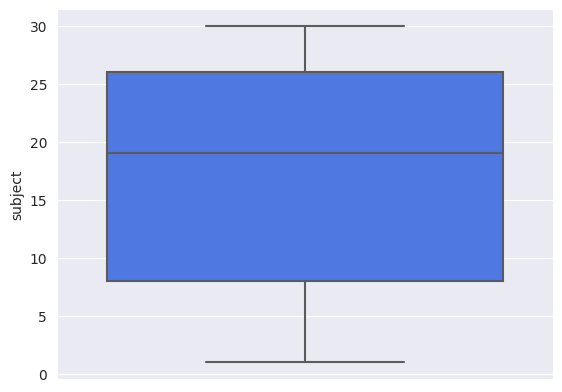

In [32]:
sns.boxplot(y=train_data['subject'])

In [33]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [34]:
train_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],axis=1,inplace=True)
test_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],axis=1,inplace=True)

In [35]:
X_train=train_data.drop(['Activity'],axis=1)
X_test=test_data.drop(['Activity'],axis=1)


y_train=train_data['Activity']
y_test=test_data['Activity']

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

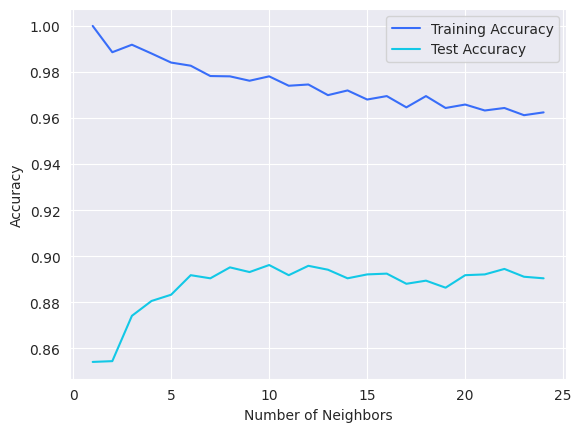

In [38]:
training_accuracy=[]
test_accuracy=[]
accuracy=[]
num_neighbors=[num for num in range(1,25)]

# Tuning for K as hyperparameter in KNN
for neighbor in num_neighbors:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train_scaled,y_train)
  y_pred=knn.predict(X_test_scaled)
  training_accuracy.append(knn.score(X_train_scaled,y_train))
  test_accuracy.append(knn.score(X_test_scaled,y_test))
  #accuracy.append(accuracy_score(y_test,y_pred))


training_accuracy=np.array(training_accuracy)
test_accuracy=np.array(test_accuracy)
#accuracy=np.array(accuracy)

#Plotting
plt.plot(num_neighbors,training_accuracy,label='Training Accuracy')
plt.plot(num_neighbors,test_accuracy,label='Test Accuracy')
#plt.plot(num_neighbors,accuracy,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [39]:
test_accuracy

array([0.8540889 , 0.85442823, 0.87410926, 0.8805565 , 0.88327112,
       0.89175433, 0.89039701, 0.89514761, 0.89311164, 0.89616559,
       0.89175433, 0.89582626, 0.89412962, 0.89039701, 0.89209365,
       0.89243298, 0.88802172, 0.88937903, 0.88632508, 0.89175433,
       0.89209365, 0.89446895, 0.89107567, 0.89039701])

In [40]:
training_accuracy

array([1.        , 0.98857454, 0.99183896, 0.98803047, 0.98408596,
       0.98272579, 0.97823721, 0.9781012 , 0.97619695, 0.9781012 ,
       0.97402067, 0.97456474, 0.96994015, 0.97198041, 0.96803591,
       0.9695321 , 0.96463547, 0.9695321 , 0.96436344, 0.96585963,
       0.9632753 , 0.96436344, 0.96123504, 0.96245919])

<Axes: >

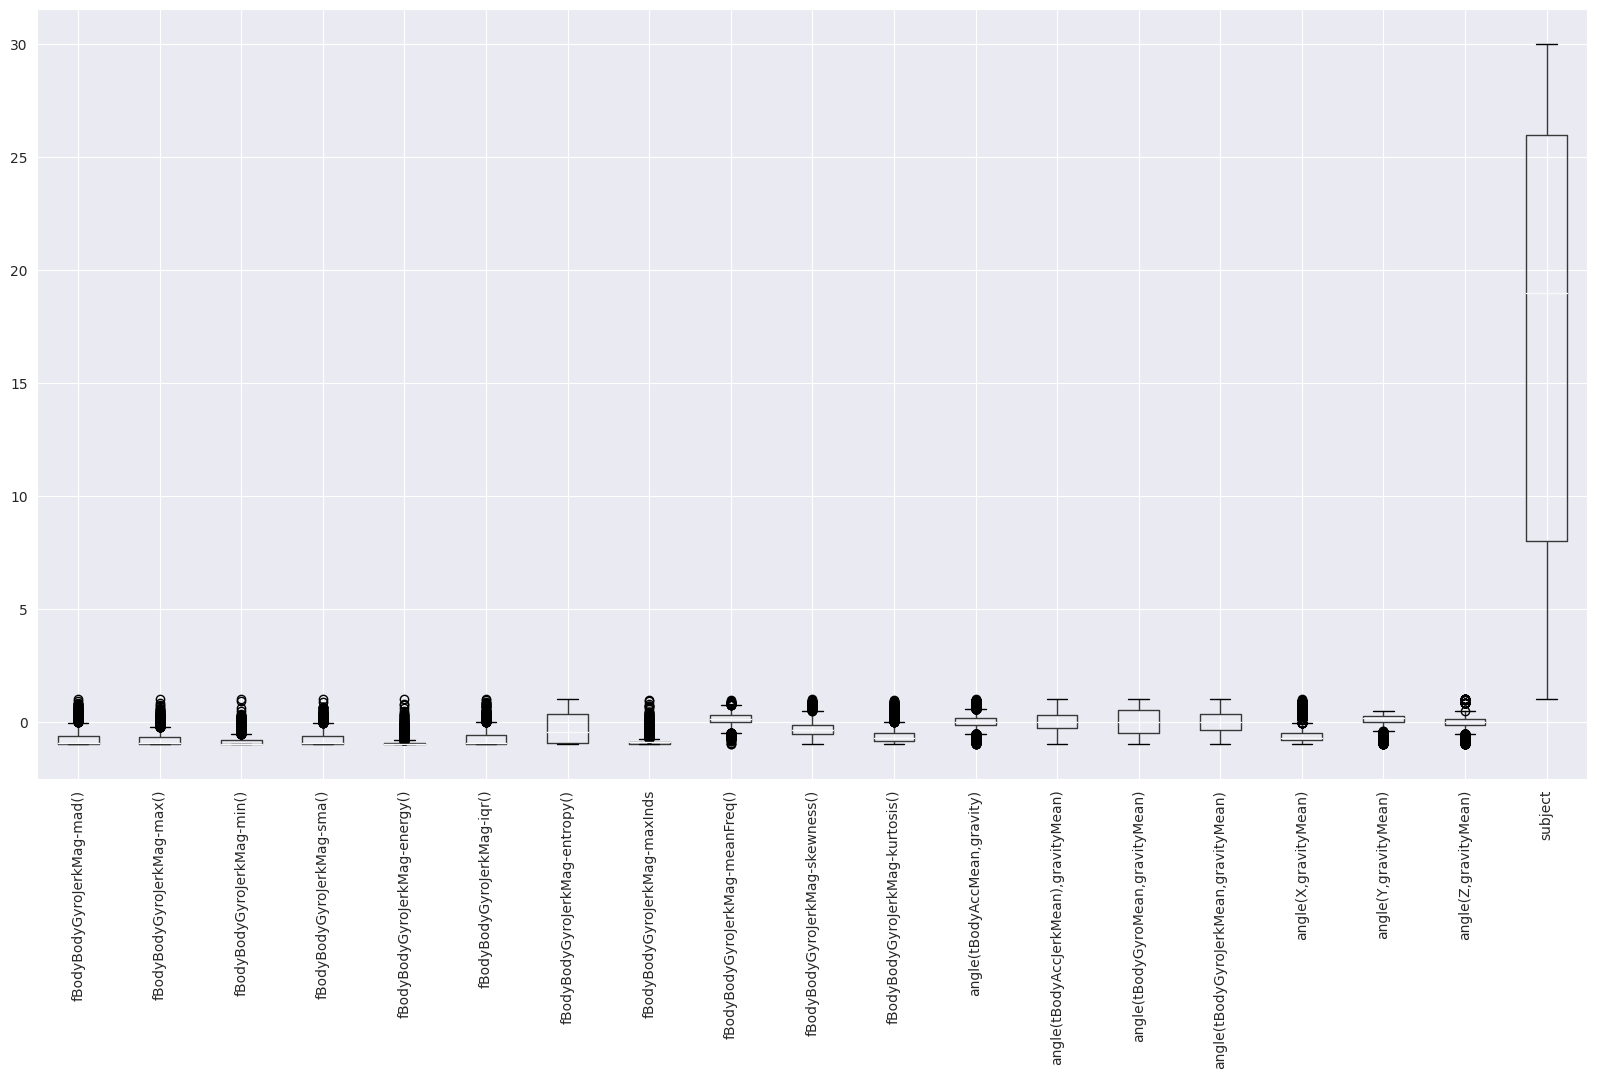

In [41]:
plt.figure(figsize=(20,10))
train_data.iloc[:,540:].boxplot(rot=90)

In [42]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
Forest_classifier=RandomForestClassifier()
Forest_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [44]:
Forest_classifier.score(X_test_scaled,y_test)

0.9260264675941635

In [45]:
Forest_classifier.score(X_train_scaled,y_train)

1.0

# We can apply dimensionality reduction to solve the problem of overfitting, which is a kind of unsupervised models before using classification models.